# Данные о пациентах

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_excel("~/Documents/Piter/Immunology/Patients_data.xlsx")
print(data.shape)
data.head()

(1741, 24)


,ID,Manifistation_Date,Hospitalization_Date,Disease_Day,Outcome,Age,Sex,Full_Vaccination,Second_Component_Date,Vaccine_Code,Days_Beetween_Vaccination_Disease,CT,Saturation,Lung_Damage,Saturation_at_discharge,Heaviness,Etiotropy,Steroids,Target_therapy,Anticoagulants,Non_steroid_antiinfflam,Comments,Omicron,Comments2
0,С-1,2021-06-12 00:00:00,2021-06-15,3.0,выписана,60.0,2.0,0.0,NaN,NaN,NaN,1,95,2.0,97,1.0,0,1,1,1,1,NaN,NaN,NaN
1,С-2,2021-06-06 00:00:00,2021-06-15,9.0,выписана,24.0,2.0,0.0,NaN,NaN,NaN,2,92,1.0,96,1.0,1,1,1,1,1,NaN,NaN,NaN
2,С-3,2021-06-11 00:00:00,2021-06-15,4.0,выписана,75.0,2.0,1.0,2021-03-14 00:00:00,1,NaN,0.12,0.96,0.0,0.96,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,С-4,2021-06-08 00:00:00,2021-06-15,7.0,выписана,64.0,2.0,0.0,2021-05-27 00:00:00,1 однокр,NaN,"КТ2 от 14.06, 24.06-40%, 05.07-40%",91,NaN,94,1.0,NaN,1,1,1,NaN,NaN,NaN,NaN
4,С-5,2021-06-04 00:00:00,2021-06-15,11.0,выписан,29.0,1.0,0.0,NaN,NaN,NaN,3,92,2.0,96,1.0,1,1,0,1,1,NaN,NaN,NaN


# Проверить даты

In [22]:
for i in data.index:
    if not (isinstance(data.loc[i, "Manifistation_Date"],datetime.date) and isinstance(data.loc[i, "Hospitalization_Date"],datetime.date)):
        data.drop(index = i, inplace = True)
data.shape

(1684, 26)

In [23]:
data = data[data["Manifistation_Date"] < data["Hospitalization_Date"]]
data.shape

(1664, 26)

# Критерии включения

- День заболевания = [5;10] день
- Возраст = [40;70] лет
- Не вакцинирован
- Не Омикрон

In [24]:
data = data[(data["Disease_Day"] >= 5) & (data["Disease_Day"] <= 10)]
data.shape

(901, 26)

In [25]:
data = data[(data["Age"] >= 40) & (data["Age"] <= 70)]
data.shape

(580, 26)

In [26]:
data = data[(data["Full_Vaccination"] == 0) & (data["Second_Component_Date"].isna()) & (data["Vaccine_Code"].isna()) & (data["Days_Beetween_Vaccination_Disease"].isna())]
data.shape

(412, 26)

In [27]:
data = data[(data["Omicron"] == 0) | (data["Omicron"].isna())]
data.shape

(412, 26)

In [29]:
data["Sex"].value_counts()

2.0    218
1.0    194
Name: Sex, dtype: int64

# Факторизовать исходы

In [28]:
data["Outcome"].value_counts()

выписана                   201
выписан                    182
амбул                        4
умер                         1
умерла 17.10                 1
умерла 01.01                 1
умерла 12.12                 1
умерла 17.11                 1
переведена на реабил         1
умер 08.10.2021              1
умер 07.10.2021              1
умерла 06.10                 1
переведена реаб.25.10        1
умерла 16.09                 1
переведен на реаб.15.10      1
умер 14.08.2021              1
умерла 25.08                 1
умерла 08.09                 1
умер 20.07.2021              1
умерла 17.08                 1
умер 21.07.2021              1
умерла 06.08                 1
умерла 31.08                 1
умер 17.07.2021              1
умер 13.06.2021              1
умер 16.07.2021              1
умер 13.07.2021              1
умер 07.02                   1
Name: Outcome, dtype: int64

In [32]:
data.loc[data['Outcome'].str.contains("выписан"),"Outcome"] = "выписка"
data.loc[data['Outcome'].str.contains("амбул"),"Outcome"] = "амбулаторно"
data.loc[data['Outcome'].str.contains("умер"),"Outcome"] = "смерть"
data.loc[data['Outcome'].str.contains("реаб"),"Outcome"] = "реабилитация"

In [33]:
data["Outcome"].value_counts()

выписка         383
смерть           22
амбулаторно       4
реабилитация      3
Name: Outcome, dtype: int64

# Отбор образцов

Необходимо, чтобы распределения возраста и пола в группах примерно совпадали по форме и группы с благоприятным исходом было несколько больше образцов, чем в группе с неблагоприятным

<AxesSubplot:xlabel='Age', ylabel='Count'>

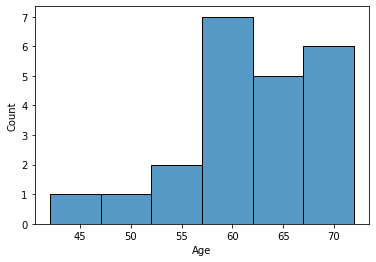

In [51]:
sns.histplot(data.loc[data["Outcome"] == "смерть","Age"],binwidth = 5)

In [54]:
data.loc[data["Outcome"] == "смерть","Age"].value_counts().sort_index()

42.0    1
50.0    1
53.0    1
55.0    1
57.0    2
59.0    3
60.0    1
61.0    1
62.0    1
65.0    3
66.0    1
68.0    3
69.0    2
70.0    1
Name: Age, dtype: int64

In [56]:
favorable = data[(data["Outcome"] == "выписка") | (data["Outcome"] == "реабилитация")]
favorable["Age"].value_counts().sort_index()

40.0    13
41.0    10
42.0     3
43.0    13
44.0    13
45.0    10
46.0    12
47.0    14
48.0     5
49.0    11
50.0     8
51.0    14
52.0     8
53.0    10
54.0    12
55.0    10
56.0    10
57.0    17
58.0    13
59.0    12
60.0    18
61.0    16
62.0    22
63.0    22
64.0    15
65.0    14
66.0    14
67.0    11
68.0    16
69.0    10
70.0    10
Name: Age, dtype: int64

In [57]:
k = 3

In [73]:
# Случайный выбор образцов из возрастных групп
age40_45 = favorable[(favorable["Age"] > 40) & (favorable["Age"] <= 45)].sample(n = 1 * k,random_state = 555)
age45_50 = favorable[(favorable["Age"] > 45) & (favorable["Age"] <= 50)].sample(n = 1 * k,random_state = 555)
age50_55 = favorable[(favorable["Age"] > 50) & (favorable["Age"] <= 55)].sample(n = 2 * k,random_state = 555)
age55_60 = favorable[(favorable["Age"] > 55) & (favorable["Age"] <= 60)].sample(n = 6 * k,random_state = 555)
age60_65 = favorable[(favorable["Age"] > 60) & (favorable["Age"] <= 65)].sample(n = 5 * k,random_state = 555)
age65_70 = favorable[(favorable["Age"] > 65) & (favorable["Age"] <= 70)].sample(n = 7 * k,random_state = 555)

In [74]:
sample_favor = pd.concat([age40_45,age45_50,age50_55,age55_60,age60_65,age65_70],axis = 0)
sample_favor["Age"].value_counts().sort_index()

41.0    1
44.0    1
45.0    1
47.0    1
49.0    2
51.0    1
52.0    1
53.0    1
54.0    1
55.0    2
56.0    3
57.0    4
58.0    3
59.0    4
60.0    4
61.0    1
62.0    6
63.0    5
64.0    2
65.0    1
66.0    4
67.0    3
68.0    5
69.0    3
70.0    6
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

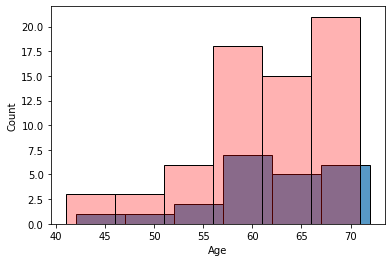

In [75]:
sns.histplot(data.loc[data["Outcome"] == "смерть","Age"],binwidth = 5)
sns.histplot(sample_favor["Age"],binwidth = 5,color = "red",alpha = 0.3)

In [77]:
len(sample_favor.index)

66

In [76]:
sample_favor["Sex"].value_counts()

2.0    39
1.0    27
Name: Sex, dtype: int64

In [66]:
data.loc[data["Outcome"] == "смерть","Sex"].value_counts()

1.0    11
2.0    11
Name: Sex, dtype: int64

# Сохраняем списки

In [79]:
final = pd.concat([data[data["Outcome"] == "смерть"],sample_favor])
final = final[["ID","Outcome","Age", "Sex"]].sort_values(by = ["Outcome","Age","Sex"])
final.head()

,ID,Outcome,Age,Sex
307,С-311,выписка,41.0,1.0
241,C-244,выписка,44.0,1.0
399,С-405,выписка,45.0,2.0
267,С-270,выписка,47.0,1.0
264,С-267,выписка,49.0,1.0


In [82]:
final[(final["Sex"] == 1) & (final["Outcome"] == "выписка")].sort_values(by = "Age").to_excel("~/Documents/Piter/Immunology/surv_men.xlsx",index = False)

In [83]:
final[(final["Sex"] == 2) & (final["Outcome"] == "выписка")].sort_values(by = "Age").to_excel("~/Documents/Piter/Immunology/surv_women.xlsx",index = False)

In [84]:
final[(final["Sex"] == 1) & (final["Outcome"] == "смерть")].sort_values(by = "Age").to_excel("~/Documents/Piter/Immunology/dead_men.xlsx",index = False)

In [85]:
final[(final["Sex"] == 2) & (final["Outcome"] == "смерть")].sort_values(by = "Age").to_excel("~/Documents/Piter/Immunology/dead_women.xlsx",index = False)

# Обработка результатов

In [5]:
results = pd.read_excel("~/Documents/Piter/Immunology/tables/results.ods",engine = "odf",index_col = 0)
results.head()

,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml"
ID,,,,,,,
70,"H1,B3",NaN,NaN,NaN,51.69,54.35,53.02
910,"A2,B2",NaN,NaN,NaN,94.23,43.04,68.64
464,"C2,D2",NaN,NaN,NaN,39.49,37.82,38.66
110,"E2,F2",NaN,NaN,NaN,17.86,21.03,19.45
7,"G2,H2",NaN,NaN,NaN,30.68,31.13,30.91


In [7]:
samples = pd.read_excel("~/Documents/Piter/Immunology/tables/samples.ods",engine = "odf",index_col = 0)
samples.head()

,Outcome,Age,Sex,Exist
ID,,,,
770,выписка,54,1,ИСТИНА
226,выписка,56,1,ИСТИНА
1153,выписка,56,1,ИСТИНА
1261,выписка,57,1,ИСТИНА
774,выписка,60,1,ИСТИНА


In [8]:
for i in results.index:
    results.loc[i,"Outcome"] = samples.loc[i,"Outcome"]
    results.loc[i,"Age"] = samples.loc[i,"Age"]
    results.loc[i,"Sex"] = samples.loc[i,"Sex"]

In [7]:
results.head()

,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml"
ID,,,,,,,
70,"H1,B3",смерть,50.0,1.0,51.69,54.35,53.02
910,"A2,B2",смерть,53.0,1.0,94.23,43.04,68.64
464,"C2,D2",смерть,55.0,1.0,39.49,37.82,38.66
110,"E2,F2",смерть,57.0,1.0,17.86,21.03,19.45
7,"G2,H2",смерть,59.0,1.0,30.68,31.13,30.91


In [9]:
results.loc[results["Outcome"] =="здоровый",]

,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml"
ID,,,,,,,
CDPS218,"A11,B11",здоровый,55.0,2.0,6.815,7.806,7.31
CDPS241,"C11,D11",здоровый,65.0,1.0,8.691,10.030,9.36
CDPS242,"E11,F11",здоровый,64.0,2.0,8.370,9.677,9.02
CDPS243,"G11,H11",здоровый,54.0,1.0,10.400,21.620,16.01
CDPS244,"A12,B12",здоровый,50.0,2.0,11.780,12.840,12.31
CDPS250,"C12,D12",здоровый,61.0,2.0,7.111,5.004,6.06
CDPS254,"E12,F12",здоровый,51.0,2.0,4.788,4.937,4.86
CDPS262,"G12,H12",здоровый,55.0,1.0,5.281,25.780,15.53


In [6]:
results.to_excel("~/Documents/Piter/Immunology/samples_used.xlsx")

<AxesSubplot:>

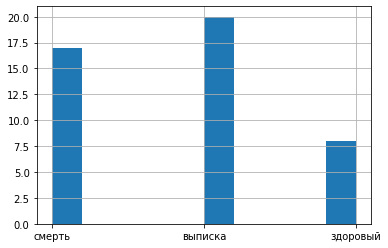

In [24]:
results["Outcome"].hist()

<AxesSubplot:>

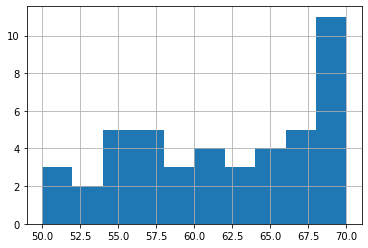

In [25]:
results["Age"].hist()

<AxesSubplot:>

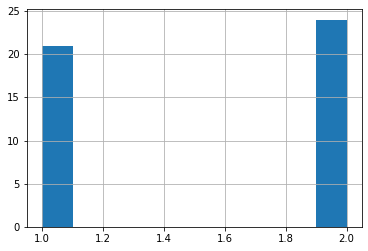

In [38]:
results["Sex"].hist()

<AxesSubplot:>

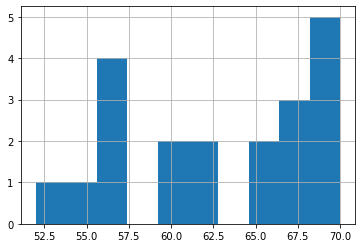

In [39]:
results.loc[results["Outcome"] == "выписка","Age"].hist()

<AxesSubplot:>

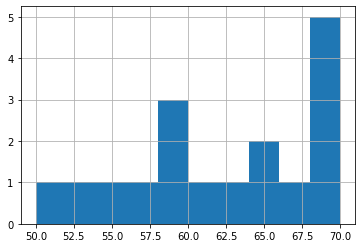

In [40]:
results.loc[results["Outcome"] == "смерть","Age"].hist()

<AxesSubplot:>

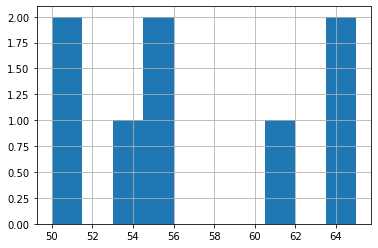

In [41]:
results.loc[results["Outcome"] == "здоровый","Age"].hist()

Text(0, 0.5, 'Возраст,года')

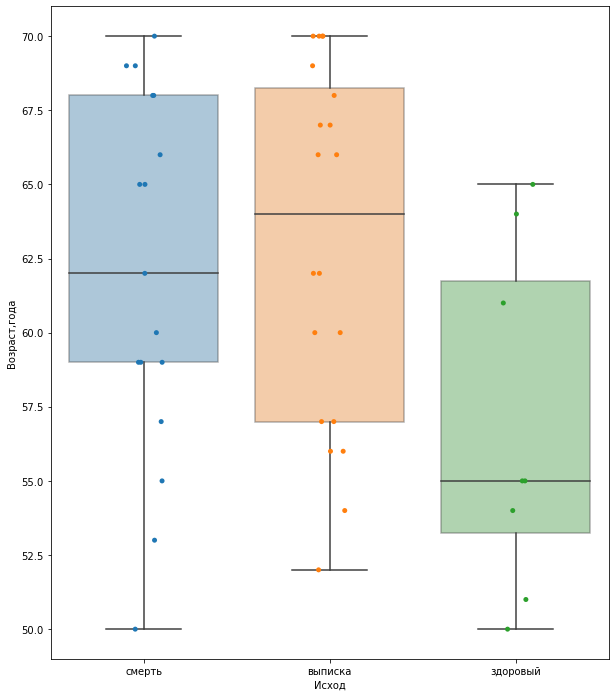

In [9]:
fig,ax = plt.subplots(figsize = (10,12))
sns.boxplot(data=results, x="Outcome", y="Age", boxprops={'alpha': 0.4},ax = ax,showfliers = False)
sns.stripplot(data=results, x="Outcome", y="Age", dodge=True, ax=ax)
ax.set_xlabel("Исход")
ax.set_ylabel("Возраст,года")
#plt.savefig("res.png",dpi = 300)

<AxesSubplot:>

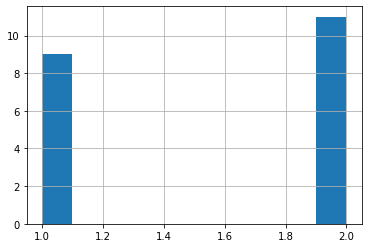

In [42]:
results.loc[results["Outcome"] == "выписка","Sex"].hist()

<AxesSubplot:>

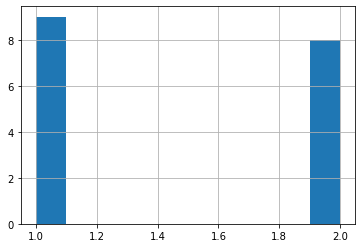

In [43]:
results.loc[results["Outcome"] == "смерть","Sex"].hist()

<AxesSubplot:>

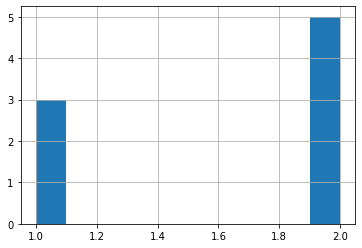

In [44]:
results.loc[results["Outcome"] == "здоровый","Sex"].hist()

<AxesSubplot:>

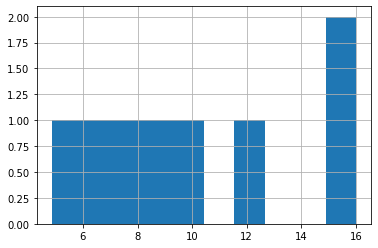

In [45]:
results.loc[results["Outcome"] == "здоровый","Mean, pg/ml"].hist()

<AxesSubplot:>

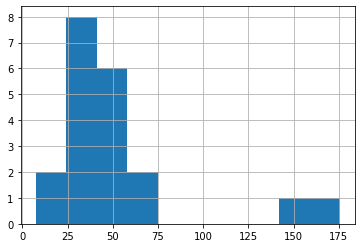

In [46]:
results.loc[results["Outcome"] == "выписка","Mean, pg/ml"].hist()

<AxesSubplot:>

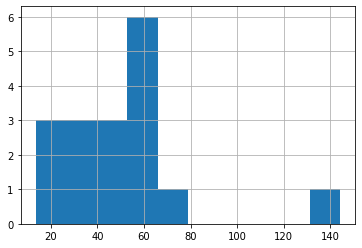

In [47]:
results.loc[results["Outcome"] == "смерть","Mean, pg/ml"].hist()

## Проверка гипотез

1. Первая
    * Н0: Средний уровень IL-6 у **_умерших_** равен таковому у **_выписывшихся_** пациентов
    * Н1: Средний уровень IL-6 у **_умерших_** выше таковому у **_выписывшихся_** пациентов
    
2. Вторая
    * Н0: Средний уровень IL-6 у **_выписывшихся_** равен таковому у **_здоровых_**
    * Н1: Средний уровень IL-6 у **_выписывшихся_** выше таковому у **_здоровых_**
    
3. Третья
    * Н0: Средний уровень IL-6 у **_больных_** равен таковому у **_здоровых_** пациентов
    * Н1: Средний уровень IL-6 у **_больных_** выше таковому у **_здоровых_** пациентов

In [10]:
from scipy.stats import mannwhitneyu

In [14]:
x = results.loc[(results["Outcome"] == "смерть"),"Mean, pg/ml"]
y = results.loc[(results["Outcome"] == "выписка"),"Mean, pg/ml"]
mannwhitneyu(x,y, use_continuity = True, alternative = "greater")

MannwhitneyuResult(statistic=190.5, pvalue=0.27107728855503743)

In [18]:
x = results.loc[(results["Outcome"] == "выписка"),"Mean, pg/ml"]
y = results.loc[(results["Outcome"] == "здоровый"),"Mean, pg/ml"]
mannwhitneyu(x,y, use_continuity = True, alternative = "greater")

MannwhitneyuResult(statistic=150.0, pvalue=4.375656549569593e-05)

In [12]:
x = results.loc[(results["Outcome"] == "смерть") | (results["Outcome"] == "выписка"),"Mean, pg/ml"]
y = results.loc[results["Outcome"] == "здоровый","Mean, pg/ml"]
mannwhitneyu(x,y, use_continuity = True, alternative = "greater")

MannwhitneyuResult(statistic=282.0, pvalue=3.695407164693908e-05)

In [55]:
df = pd.read_excel("~/Downloads/цитокины воспроизводимость хех.xlsx",index_col = 0)
df.head()

,sCD40L (12),EGF (13),Eotaxin (14),FGF-2 (15),Flt-3L (18),Fractalkine (19),G-CSF (20),GROa (22),IFNa2 (25),IFNg (26),IL-1a (27),IL-1b (28),IL-1RA (29),IL-2 (30),IL-3 (33),IL-4 (34),IL-5 (35),IL-6 (36),IL-7 (37),IL-8 (38),IL-9 (39),IL-10 (42),IL-12(p40) (43),IL-12(p70) (44),IL-13 (46),IL-15 (47),IL-17A (48),IL-17E/IL-25 (51),IL-17F (53),IL-18 (54),Unnamed: 31,IL-27 (56),IP-10 (57),MCP-1 (61),MCP-3 (62),M-CSF (63),MDC (64),MIG/CXCL9 (65),MIP-1a (66),MIP-1b (67),PDGF-AA (72),PDGF-AB/BB (73),TGF a (75),TNF a (76),TNF b (77),VEGF-A (78),IL-22 (55),GM-CSF (21)
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
546.0,4735.379,199.142600,56.25480,44.71625,3.765309,131.45290,72.38761,87.50420,31.79050,2.38324,6.455840,5.076273,14.964850,0.728805,1.239405,2.354653,2.250741,61.19382,9.681900,28.640190,7.537803,19.22701,26.56493,4.862956,46.55725,11.763500,3.379161,160.28060,27.28690,453.2738,NaN,8497.798,138249.900,918.2180,25.317570,241.95730,387.6014,2406.433,11.591100,12.64192,3587.185,29637.59,3.071599,119.96540,6.094970,101.14250,0.0,0.0
577.0,4243.735,9.049793,117.33180,39.32560,11.161680,78.41877,182.99860,171.46240,36.76734,42.37721,0.046928,4.342502,114.845800,0.837913,0.950580,2.457084,1.470934,167.2522,3.468563,55.768360,4.297981,53.56606,49.20442,4.862956,38.76379,16.221320,1.227497,125.38190,25.22708,353.7754,NaN,5760.764,261706.600,1584.6420,22.113930,374.37400,393.0840,4595.521,11.591100,15.41848,3342.615,27570.72,4.891874,132.31420,8.533460,275.82750,0.0,0.0
695.0,3110.253,47.814400,68.43403,47.38342,4.258966,189.73750,50.12771,21.54733,46.22119,21.17868,4.798429,5.442971,72.715010,0.893033,1.657492,4.021199,2.857858,44.66227,3.791186,14.477610,12.767640,62.69871,57.22725,13.438040,90.93730,7.767109,8.162403,454.46460,28.87629,154.0887,NaN,3230.805,9162.438,1079.1690,26.844700,177.71070,610.5281,2798.264,17.209750,24.40166,3654.242,24238.19,2.930364,61.25769,8.533460,128.32690,0.0,0.0
731.0,2516.231,144.209800,41.00422,42.03081,1.398762,56.86760,55.72710,57.39148,30.08505,0.00000,0.000000,0.000000,14.119530,0.000000,0.950580,0.956448,1.097248,26.95535,1.890922,4.075204,1.000954,9.35116,22.31873,1.109059,13.98396,7.525135,1.227497,52.39677,22.74888,174.1827,NaN,1544.654,18343.890,338.4619,4.277423,161.56670,416.3359,2199.346,3.002720,15.66350,1224.850,12043.15,1.490340,64.74691,2.585945,79.23200,0.0,0.0
777.0,1779.697,30.959830,30.51114,39.32560,3.156209,97.52692,55.72710,10.70681,30.08505,0.00000,0.000000,2.873132,5.898078,0.311650,0.950580,1.746285,1.470934,10.06107,1.286427,2.555777,3.707229,12.53433,22.31873,4.862956,22.56755,4.260228,2.673379,228.19800,24.22284,107.4381,NaN,1377.922,13367.520,336.9850,14.818010,64.98027,282.4567,1241.533,8.365783,13.61402,1490.806,16262.19,1.612257,54.33135,3.153988,20.48664,0.0,0.0


In [57]:
ind = list(set(df.index).intersection(results.index))

In [58]:
results.loc[ind,"Mean, pg/ml"]

ID
865    13.65
546    57.35
998    57.40
910    68.64
822    13.60
Name: Mean, pg/ml, dtype: float64

In [59]:
df.loc[ind,"IL-6 (36)"]

Sample
865    6.766606
546    61.19382
998    1194.005
910    37.52565
822     4.06904
Name: IL-6 (36), dtype: object

In [60]:
results.loc[ind,"Outcome"]

ID
865     смерть
546     смерть
998    выписка
910     смерть
822     смерть
Name: Outcome, dtype: object

In [7]:
results.head()

,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml"
ID,,,,,,,
70,"H1,B3",смерть,50.0,1.0,51.69,54.35,53.02
910,"A2,B2",смерть,53.0,1.0,94.23,43.04,68.64
464,"C2,D2",смерть,55.0,1.0,39.49,37.82,38.66
110,"E2,F2",смерть,57.0,1.0,17.86,21.03,19.45
7,"G2,H2",смерть,59.0,1.0,30.68,31.13,30.91


In [10]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 70 to CDPS262
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Holes         45 non-null     object 
 1   Outcome       45 non-null     object 
 2   Age           45 non-null     float64
 3   Sex           45 non-null     float64
 4   Try_1, pg/ml  45 non-null     float64
 5   Try_2, pg/ml  44 non-null     float64
 6   Mean, pg/ml   45 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.9+ KB


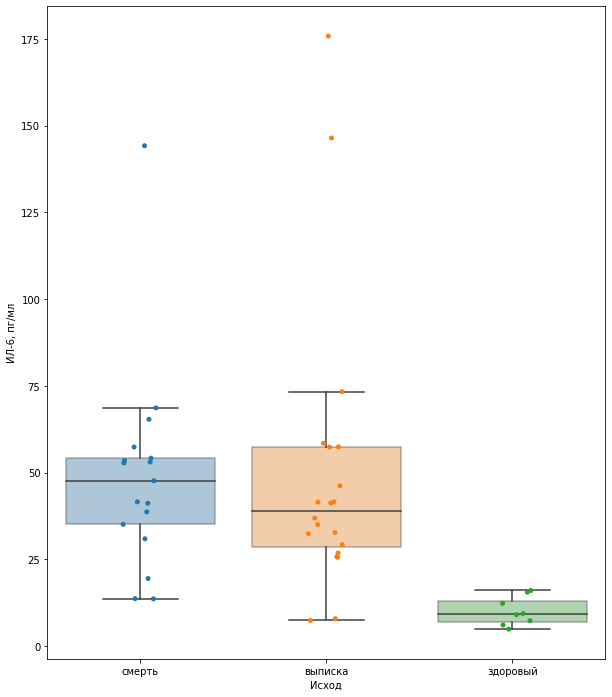

In [31]:
fig,ax = plt.subplots(figsize = (10,12))
sns.boxplot(data=results, x="Outcome", y="Mean, pg/ml", boxprops={'alpha': 0.4},ax = ax,showfliers = False)
sns.stripplot(data=results, x="Outcome", y="Mean, pg/ml", dodge=True, ax=ax)
ax.set_xlabel("Исход")
ax.set_ylabel("ИЛ-6, пг/мл")
plt.savefig("res.png",dpi = 300)

In [21]:
results[["Outcome","Sex"]].value_counts()

Outcome   Sex
выписка   2.0    11
          1.0     9
смерть    1.0     9
          2.0     8
здоровый  2.0     5
          1.0     3
dtype: int64

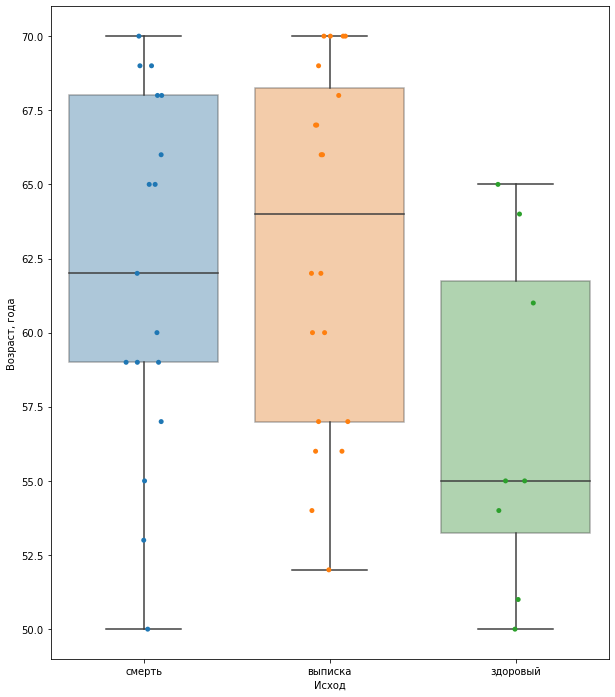

In [43]:
fig,ax = plt.subplots(figsize = (10,12))
sns.boxplot(data=results, x="Outcome", y="Age", boxprops={'alpha': 0.4},ax = ax,showfliers = False)
sns.stripplot(data=results, x="Outcome", y="Age", dodge=True, ax=ax)
ax.set_xlabel("Исход")
ax.set_ylabel("Возраст, года")
plt.savefig("age.png",dpi = 300)

In [8]:
r1 = results.copy()

In [9]:
for i in r1.index:
    if samples.loc[i,"Outcome"] == "здоровый":    
        r1.loc[i,"Outcome"] = samples.loc[i,"Outcome"]
    else:
        r1.loc[i,"Outcome"] = "больной"
    r1.loc[i,"Age"] = samples.loc[i,"Age"]
    r1.loc[i,"Sex"] = samples.loc[i,"Sex"]

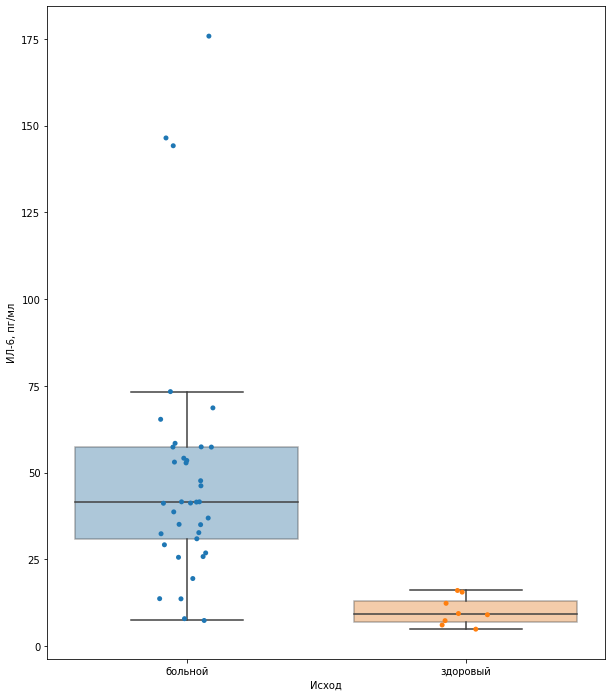

In [10]:
fig,ax = plt.subplots(figsize = (10,12))
sns.boxplot(data=r1, x="Outcome", y="Mean, pg/ml", boxprops={'alpha': 0.4},ax = ax,showfliers = False)
sns.stripplot(data=r1, x="Outcome", y="Mean, pg/ml", dodge=True, ax=ax)
ax.set_xlabel("Исход")
ax.set_ylabel("ИЛ-6, пг/мл")
plt.savefig("il6_1.png",dpi = 300)

In [12]:
print(results.loc[(results["Outcome"] == "выписка"),"Mean, pg/ml"].mean())
print(results.loc[(results["Outcome"] == "смерть"),"Mean, pg/ml"].mean())
print(results.loc[(results["Outcome"] == "здоровый"),"Mean, pg/ml"].mean())
print(results.loc[(r1["Outcome"] == "здоровый"),"Mean, pg/ml"].mean())
print(results.loc[(r1["Outcome"] == "больной"),"Mean, pg/ml"].mean())

49.93499999999999
48.86176470588236
10.057500000000001
10.057500000000001
49.4418918918919
